# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `7` | `Questions`

> Hi, Team. 👋

> Again, I hope the second half of your semester is off to a great start. 👍 

> The exercise questions ask you to solve three bigger questions. As with our previous exercise problem sets, while answering the questions you will be able to incorporate what you learned in class and consolidate your understanding.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [4]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

In [6]:
%matplotlib inline

## 👇 <font color = "purple"> Bigger Question 1. 

> Here's something that's familiar to you, with a few minor tweaks.

### Please create a predictive model for the weekly return of AMZN stock. You will use supervised learning for your predictive modelling.

> As you learned in class, to do this it is essential to know what factors are related to Amazon’s stock price, and to incorporate as much information as you can into the model.

> Among the three major factors (correlated assets, technical indicators, and fundamental analysis), you will use correlated assets and technical indicators as features here.

    Step 1. Use 75% of your data for the training of your algorithm, and 25% for the testing set.

    Step 2. For your feature engineering...
    
> Our operational definition of `outcome` (`Y`) is the weekly return of Amazon (AMZN). The number of trading days in a week is assumed to be five, and we compute the return using five trading days. 
<br>
    
* <font color = "green"> NOTE: The lagged five-day variables embed the time series component by using a time-delay approach, where the lagged variable is included as one of the predictor variables. This step translates the time series data into a supervised regression-based model framework.
<br>    
    
> For `input features` (`predictors`; `Xs`), we use (The variables used as predictors are as follows) ...

> `Correlated assets`

* lagged five-day returns of stocks (AAPL, MSFT, F);
* currency exchange rates (USD/JPY and GBP/USD);
* indices (S&P 500, Dow Jones, and VIX);
* lagged five-day, 15-day, 30-day, and 60-day returns of AMZN.

> `Technical indicators`

* 21-day, 63-day, and 252-day moving averages;
* 10-day, 30-day, and 200-day exponential moving averages.

    
    Step 3. For your algorithm of choices, please assess the model performance of the following algorithms: 

* Linear Regression
* Elastic Net
* LASSO
* Support Vector Machine
* K-Nearest Neighbor
* ARIMA
* Decision Tree
* Extra Trees 
* Random Forest
* Gradient Boosting Tree
* Adaptive Boosting
    
    
    Step 4. For this exercise, hyperparameter tuning won’t be requested. 
    
    Step 5. But make sure to compare the model performance of the above algorithms.

> The metric for assessing model performance will be mean squared error (`MSE`).
<br>

> Show which of the algorithms perform relatively better by a comparison visualization of performance, for both the training and testing sets learned in class. 

    Step 6. Using the model of your choice, please visualize the actual vs. predicted (estimated) data.

### Below are the lines of code that lead to an answer:

In [3]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import chi2, f_regression

from sklearn.feature_selection import SelectKBest

In [5]:
import statsmodels.tsa.arima.model as stats
import statsmodels.api as smb

In [6]:
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf

In [147]:
stock_ticker = ['AMZN', 'AAPL', 'MSFT', 'F']
currency_ticker = ["DEXJPUS", "DEXUSUK"]
index_ticker = ["SP500", "DJIA", "VIXCLS"]

stock_data = pdr.DataReader(stock_ticker, "yahoo")
currency_data = pdr.DataReader(currency_ticker, "fred")
index_data = pdr.DataReader(index_ticker, "fred")

In [148]:
AMZN_df = pdr.DataReader('AMZN', 'yahoo')

In [149]:
return_period = 5

In [150]:
Y = np.log(stock_data.loc[:, ("Adj Close", "AMZN")]).diff(return_period).shift(-return_period)

Y.name = Y.name[-1] + '_pred'

In [151]:
X1 = np.log(stock_data.loc[:, ("Adj Close", 
                              ("AAPL", "MSFT", "F"))]
           ).diff(return_period)
X1.columns = X1.columns.droplevel()

In [152]:
X2 = np.log(currency_data).diff(return_period)

In [153]:
X3 = np.log(index_data).diff(return_period)

In [154]:
X4 = pd.concat([np.log(stock_data.loc[:, ("Adj Close", 'AMZN')
                                     ]
                      ).diff(i) for i in [return_period, return_period * 3, return_period * 6, return_period * 12
                                         ]
               ], axis = 1
              ).dropna()

X4.columns = ['AMZN_DT', 'AMZN_3DT', 'AMZN_6DT', 'AMZN_12DT']

In [155]:
X = pd.concat([X1, X2, X3, X4], axis = 1)

In [156]:
# Moving Average
def MA(df, n):
    MA = pd.Series(df['Adj Close'].rolling(window = n, min_periods = n).mean(), 
                  name = "MA_" + str(n))
    return MA

In [157]:
X['MA21'] = MA(AMZN_df, 21)
X['MA63'] = MA(AMZN_df, 63)
X['MA252'] = MA(AMZN_df, 252)

In [159]:
def EMA(df, n):
    EMA = pd.Series(df['Adj Close'].ewm(span = n, 
                                       min_periods = n).mean(), 
                   name = 'EMA_' + str(n))
    
    return EMA

In [161]:
X['EMA10'] = EMA(AMZN_df, 10)
X['EMA30'] = EMA(AMZN_df, 30)
X['EMA200'] = EMA(AMZN_df, 200)

In [163]:
data = pd.concat([Y, X], axis = 1).dropna().\
iloc[: :return_period, :]

In [164]:
Y = data.loc[:, Y.name]
X = data.loc[:, X.columns]

### Data Split

In [165]:
# step 1 data split
validation_size = 0.25

train_size = int(len(X) * (1 - validation_size))

X_train = X[0:train_size]
X_test = X[train_size:len(X)]

Y_train = Y[0: train_size]
Y_test = Y[train_size:len(Y)]

### Ten-fold Cross Validation and Evaluation Metrics

In [166]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

### Fitting: Model Comparision with ML Algorithms

In [167]:
# fitting: model comparison with ML algorithms

models = []

In [168]:
# Linear regression
models.append(("LR", LinearRegression()))

# Elastic Net
models.append(("EN", ElasticNet()))

# LASSO
models.append(("LASSO", Lasso()))

# Support Vector Machine
models.append(("SVR", SVR()))

# K-Nearest Neighbor
models.append(("KNN", KNeighborsRegressor()))

# Decision Tree
models.append(("CART", DecisionTreeRegressor()))

# Extra Trees
models.append(("ETR", ExtraTreesRegressor()))

# Random Forest
models.append(("RFR", RandomForestRegressor()))

# Gradient Boosting Tree
models.append(("GBR", GradientBoostingRegressor()))

# Adaptive Boosting
models.append(("ABR", AdaBoostRegressor()))

In [169]:
import warnings

In [170]:
warnings.filterwarnings("ignore")

### Compare Algorithms' Performance

In [171]:
names = []

kfold_results = []

train_results = []
test_results = []

for name, model in models:
    names.append(name)
    
    # K-fold analysis
    kfold = KFold(n_splits = num_folds, 
                 random_state = seed, shuffle=True)
    
    # Let's convert MSE to positive
    
    cv_results = -1 * cross_val_score(model, X_train, Y_train, 
                                     cv = kfold, 
                                     scoring = scoring)
    kfold_results.append(cv_results)
    
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(message)

LR: 0.002292 (0.001182) 0.001658 0.004121
EN: 0.001888 (0.001117) 0.001870 0.003950
LASSO: 0.001888 (0.001117) 0.001870 0.003950
SVR: 0.002391 (0.001201) 0.002387 0.005711
KNN: 0.002004 (0.000961) 0.001304 0.004545
CART: 0.003964 (0.001220) 0.000000 0.007315
ETR: 0.002195 (0.000999) 0.000000 0.004500
RFR: 0.002239 (0.001082) 0.000337 0.003946
GBR: 0.002551 (0.001183) 0.000080 0.005571
ABR: 0.002261 (0.001111) 0.000750 0.003999


### ARIMA

In [173]:
X_train_ARIMA = X_train.loc[:, 
                           ['AAPL', "MSFT", "F", "DEXJPUS", "DEXUSUK", "SP500", "DJIA", "VIXCLS"]]

X_test_ARIMA = X_test.loc[:, 
                           ['AAPL', "MSFT", "F", "DEXJPUS", "DEXUSUK", "SP500", "DJIA", "VIXCLS"]]

train_len = len(X_train_ARIMA)
test_len = len(X_test_ARIMA)
total_len = len(X)

In [174]:
modelARIMA = stats.ARIMA(endog = Y_train, exog = X_train_ARIMA, order = [1, 0, 0])

model_fit = modelARIMA.fit()

In [175]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)

predicted = model_fit.predict(start = train_len - 1, 
                             end = total_len - 1, 
                             exog = X_test_ARIMA)[1:]

error_Test_ARIMA = mean_squared_error(Y_test, 
                                     predicted)

error_Test_ARIMA

0.0041178835588846

In [176]:
test_results.append(error_Test_ARIMA)

train_results.append(error_Training_ARIMA)

names.append("ARIMA")

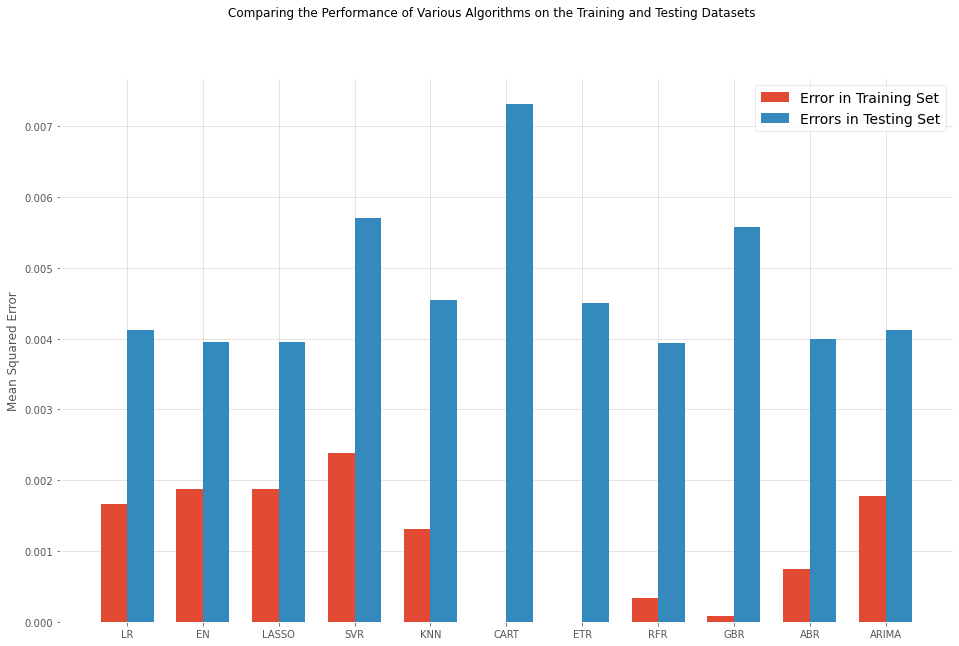

In [177]:
fig = plt.figure(figsize = (16, 10))

ind = np.arange(len(names))

width = 0.35

fig.suptitle("Comparing the Performance of Various Algorithms on the Training and Testing Datasets")
ax = fig.add_subplot(111)

plt.bar(ind - width / 2, 
       train_results, 
       width = width, 
       label = 'Error in Training Set')

plt.bar(ind + width / 2, 
       test_results, 
       width = width, 
       label = 'Errors in Testing Set')

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error")

plt.show()

According to the result of each models above, we could see the mean squared error for the train set of Elastic net is the smallest. As wel, the mean squared error for Elastic net is not too small. Therefore, I would like to select Elastic net as the predictive model. 

In [182]:
model = ElasticNet()

res = model.fit(X_train, Y_train)

predict_value = res.predict(X_test)[1:]

predict_value = pd.DataFrame(predict_value)

predict_value.index = Y_test.index[1:]

### <font color = red> Answer 1 is presented in the cell below: </font>

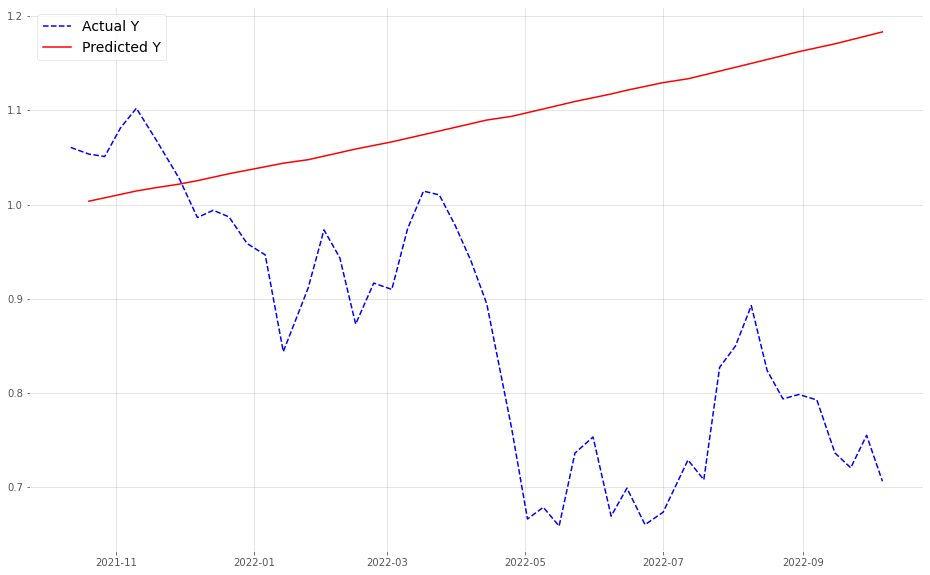

In [183]:
plt.figure(figsize = (16, 10))

plt.plot(np.exp(Y_test).cumprod(), 'b--', 
         label = 'Actual Y')

plt.plot(np.exp(predict_value).cumprod(), 'r', 
        label = "Predicted Y")

plt.legend()

plt.show()

## <font color = blue> 👉 Questions 2 to 5 ask you to build, execute, and backtest a trend-following (momentum-based) strategy, using `Relative Strength Index` (`RSI`). </font>

#### The Relative Strength Index (RSI) is an indicator that uses the closing prices of an asset to identify oversold and overbought conditions. 

> Most commonly, RSI is calculated using a 14-day period, and measured on a scale from zero to 100. (It is an oscillator.)

> Traders usually buy an asset when it is oversold (when its RSI is below 30) and sell when it is overbought (when its RSI is above 70). 

> More extreme overbought and oversold levels, such as 80 and 20, are used less frequently, and imply stronger momentum.

#### You are asked to build a trading strategy with the following set of rules.

### <font color = green> NOTE: Apple (`AAPL`) as our security of interest. The `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade.

- You can go long and short.
<br>

- To calculate RSI, use 14 periods (trading days).
<br>

- Enter a long position if RSI crosses the lower threshold (standard value of 30), moving upwards. Exit the position when RSI becomes higher than the middle level (value of 50).
<br>

- Enter a short position if RSI crosses the upper threshold (standard value of 70), moving downwards. Exit the position when RSI becomes less than 50.
<br>

- Only one position can be open at a time.

### <font color = green> NOTE: The RSI is defined as follows:
    
### Calculating the RSI first requires the RS which requires an average value of n-many previous trading days. 
<br>
    
- As discussed, a value of 14 days is common for the RSI calculation. 
<br>
    
- The first RS value requires the price from all 14 of the first trading days. Often, this is a source of confusion with the RSI given successive values only require the most recent. 
   
    
    Step 1. For 14 periods, calculate the difference in price from the current period and the previous period
    
    Step 2. For each period, record each positive change in price as a gain and each negative change as a loss
    
    Step 3. On the 14th period, calculate the arithmetic mean of the gains and losses for the entire 14 day period (e.g. gains / 14 & losses / 14)
    
    Step 4. Use these values to calculate the RS
    
### <center> $ RS = \frac{AverageGain}{AverageLoss} $
    
    Step 5. Use the RS value to calculate the RSI
    
    Step 6. For each proceeding period, use only the previous RSI value to calculate the next average value 
    by multiplying by our lookback period – 1 (e.g., 13 for a lookback of 14).
    
    Step 7. Add the value obtained in Step 6 to the current day’s value (run this for both the gains and losses)
    
### <center> $ RSI = 100 - \frac{100}{1 + RS} $

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [23]:
AAPL_df = pdr.DataReader('AAPL', 'yahoo', start = dt.datetime(2015, 1, 2), end = dt.datetime(2017, 12, 31))

In [24]:
days = 14

In [25]:
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    
    u[u.index[period - 1]] = np.mean(u[:period])
    
    u = u.drop(u.index[:(period - 1)
                      ]
              )
    d[d.index[period - 1]] = np.mean(d[:period])
    d = d.drop(d.index[:(period - 1)
                      ]
              )
    rs = u.ewm(com = period - 1, adjust = False).mean() / \
    d.ewm(com = period - 1, adjust = False).mean()
    
    return 100 - 100 / (1 + rs)

In [26]:
AAPL_df2 = pd.DataFrame()
AAPL_df2['Adj Close'] = AAPL_df['Adj Close']
AAPL_df2['RSI'] = RSI(AAPL_df2['Adj Close'], days)

In [27]:
upper_bound = 70
lower_bound = 30
middle_value = 50

In [55]:
# long position
AAPL_df2['Position'] = np.where((AAPL_df2['Adj Close'] < AAPL_df2['Adj Close'].shift(1)) & (AAPL_df2['RSI'] >= lower_bound),
                                1, 
                                np.nan)
AAPL_df2['Position'] = np.where((AAPL_df2['Position'].shift(1) == 1) & (AAPL_df2['RSI'] < middle_value), 
                                1, 
                                AAPL_df2['Position'])
AAPL_df2['Position'] = np.where((AAPL_df2['Position'].shift(1) == 1) & (AAPL_df2['RSI'] >= middle_value), 
                               0, 
                               AAPL_df2['Position'])
# short position
AAPL_df2['Position'] = np.where((AAPL_df2['Adj Close'] > AAPL_df2['Adj Close'].shift(1)) & (AAPL_df2['RSI'] <= upper_bound),
                                -1, 
                                AAPL_df2['Position'])
AAPL_df2['Position'] = np.where((AAPL_df2['Position'].shift(1) == -1) & (AAPL_df2['RSI'] > middle_value), 
                                -1, 
                                AAPL_df2['Position'])
AAPL_df2['Position'] = np.where((AAPL_df2['Position'].shift(1) == -1) & (AAPL_df2['RSI'] <= middle_value), 
                               0, 
                               AAPL_df2['Position'])

AAPL_df2['Position'] = np.where((AAPL_df2['Position'].shift(1) != -1) & (AAPL_df2['RSI'] <= 50) 
                                & (AAPL_df2['Position'].shift(1) != 1) & (AAPL_df2['RSI'] <= 70) & 
                                (AAPL_df2['RSI'] >= 30), 0, AAPL_df2['Position'])

In [56]:
AAPL_df2.head(40)

,Adj Close,RSI,Position
Date,,,
2015-01-02,24.603201,NaN,NaN
2015-01-05,23.910089,NaN,NaN
2015-01-06,23.912352,NaN,NaN
2015-01-07,24.247650,NaN,NaN
2015-01-08,25.179296,NaN,NaN
2015-01-09,25.206299,NaN,NaN
2015-01-12,24.585201,NaN,NaN
2015-01-13,24.803486,NaN,NaN
2015-01-14,24.708969,NaN,NaN


### <font color = red> Answer 2 is presented in the cell below: </font>

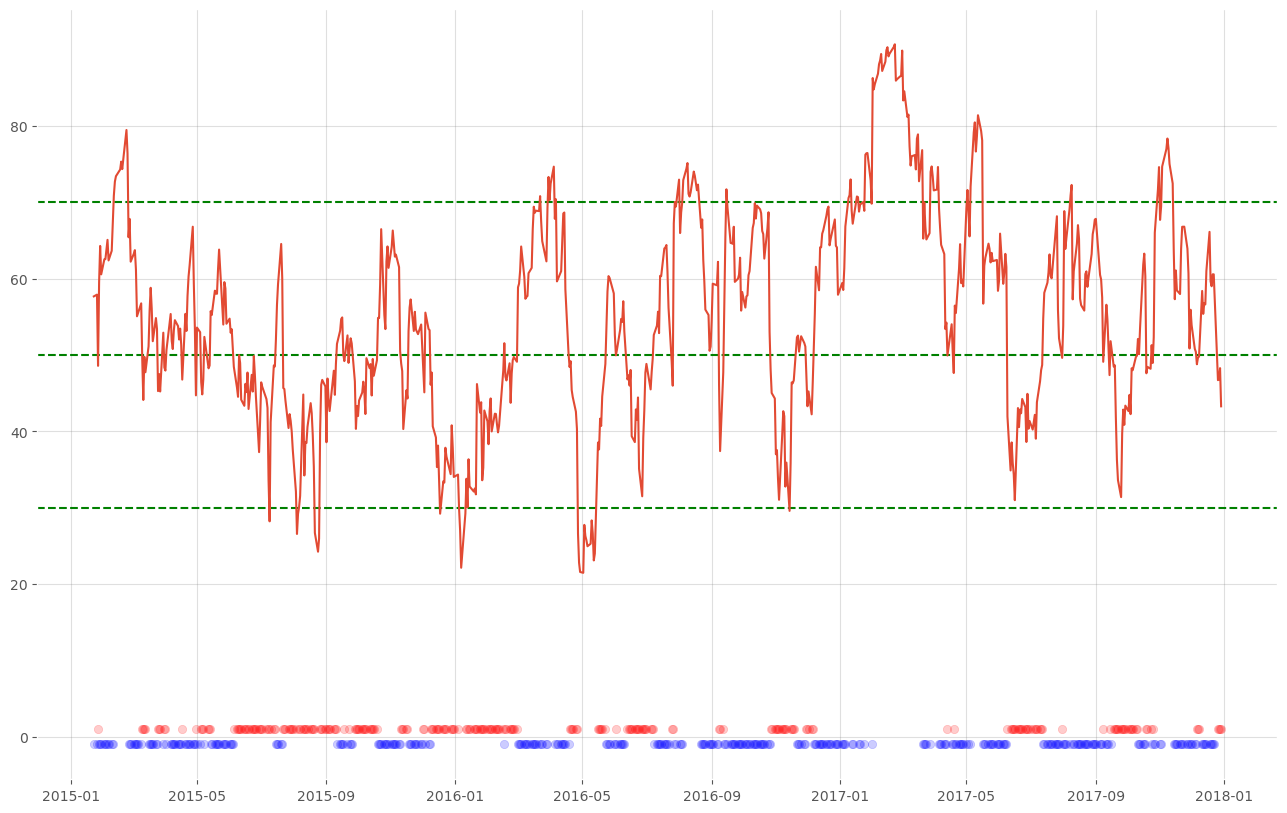

In [15]:
plt.figure(figsize = (16, 10))

plt.axhline(upper_bound, color = 'green', ls = "--")
plt.axhline(middle_value, color = 'green', ls = '--')
plt.axhline(lower_bound, color = 'green', ls = '--')

plt.plot(AAPL_df2['RSI'])

plt.scatter(x = AAPL_df2.Position[AAPL_df2.Position == 1].index, 
           y = AAPL_df2.Position[AAPL_df2.Position == 1], color = 'red', 
           alpha = 0.2)

plt.scatter(x = AAPL_df2.Position[AAPL_df2.Position == -1].index, 
           y = AAPL_df2.Position[AAPL_df2.Position == -1], color = 'blue', 
           alpha = 0.2)

plt.show()

### <font color = blue> 👉 Question 3</font>. How much in cumulative returns could you have had as a result of the RSI strategy?

### Below are the lines of code that lead to an answer:

In [16]:
trading_opportunity = ((AAPL_df2['Position'] == 1).sum() + (AAPL_df2['Position'] == -1).sum()) * 2

In [17]:
AAPL_df2['Position'] = AAPL_df2['Position'].ffill().fillna(0)

AAPL_df2

,Adj Close,RSI,Position
Date,,,
2015-01-02,24.603203,NaN,0.0
2015-01-05,23.910091,NaN,0.0
2015-01-06,23.912340,NaN,0.0
2015-01-07,24.247648,NaN,0.0
2015-01-08,25.179296,NaN,0.0
...,...,...,...
2017-12-22,41.604240,60.561103,-1.0
2017-12-26,40.548737,46.701530,1.0
2017-12-27,40.555870,46.790159,1.0


In [18]:
AAPL_df2['Return'] = np.log(AAPL_df2['Adj Close'] / AAPL_df2['Adj Close'].shift(1))

AAPL_df2['Strategy'] = AAPL_df2['Position'].shift(1) * AAPL_df2['Return']

AAPL_df2['Cumulative_Return'] = AAPL_df2['Strategy'].cumsum().apply(np.exp)

In [19]:
5 * trading_opportunity

6170

In [20]:
cum_return = (AAPL_df2['Cumulative_Return'][-1] * 100000 - 5 * trading_opportunity) / 100000 

In [21]:
print("The cumulative return is {}% have had in the result of RSI".format(round(cum_return * 100, 4)))

The cumulative return is 66.6% have had in the result of RSI


### <font color = red> Answer 3 </font>

    The answer is 81.9301 % .

### <font color = blue> 👉 Question 4</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [201]:
AAPL_df2['MAX_GROSS_PERFORMANCE'] = AAPL_df2['Cumulative_Return'].cummax()

<AxesSubplot:xlabel='Date'>

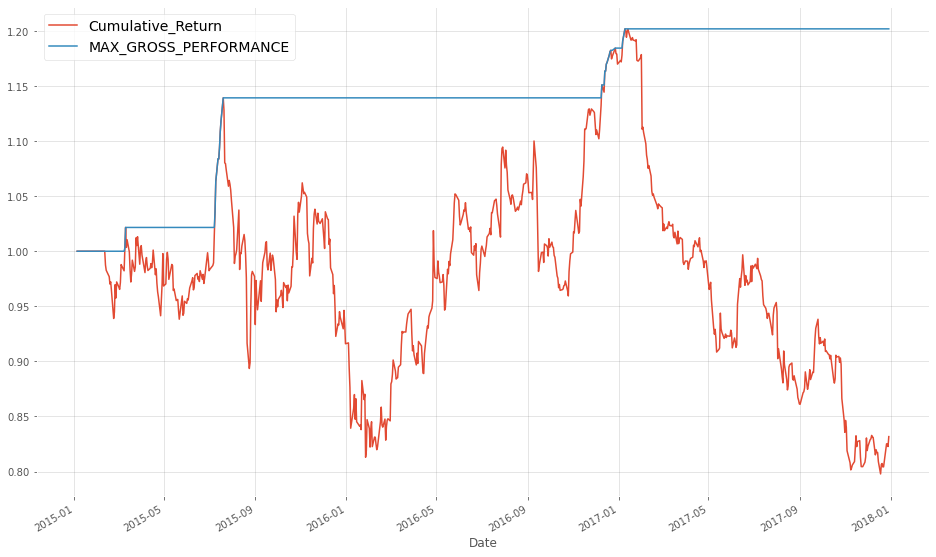

In [202]:
AAPL_df2[['Cumulative_Return', 'MAX_GROSS_PERFORMANCE']].dropna().plot(figsize = (16, 10))

In [203]:
drawdown = AAPL_df2['MAX_GROSS_PERFORMANCE'] - AAPL_df2['Cumulative_Return']

In [204]:
period = drawdown[drawdown == 0].index[1:].to_pydatetime() - drawdown[drawdown == 0].index[:-1].to_pydatetime()

In [205]:
period_df = pd.DataFrame(period, columns = ['period']).sort_values(by = 'period', ascending = False).head()

In [206]:
period_df.iloc[0, 0].days

508

In [207]:
print("The worst drawdown period duration is {} days".format(period_df.iloc[0, 0].days))

The worst drawdown period duration is 508 days


In [208]:
print("The second worst drawdown period duration is {} days".format(period_df.iloc[1, 0].days))

The second worst drawdown period duration is 120 days


In [209]:
print("The third worst drawdown period duration is {} days".format(period_df.iloc[2, 0].days))

The third worst drawdown period duration is 27 days


In [210]:
print("The forth worst drawdown period duration is {} days".format(period_df.iloc[3, 0].days))

The forth worst drawdown period duration is 10 days


In [211]:
print("The fifth worst drawdown period duration is {} days".format(period_df.iloc[4, 0].days))

The fifth worst drawdown period duration is 6 days


In [212]:
worst_drawdown = drawdown.loc[drawdown[drawdown == 0].\
                              index[period_df.index[0]]:drawdown[drawdown == 0].index[period_df.index[0] + 1]].max()

In [213]:
print("The worst drawdown net drawdown rate is {}%".format(round(worst_drawdown * 100, 4)))

The worst drawdown net drawdown rate is 32.6285%


In [214]:
worst_drawdown2 = drawdown.loc[drawdown[drawdown == 0].\
            index[period_df.index[1]]:drawdown[drawdown == 0].index[period_df.index[1] + 1]].max()

In [215]:
print("The second worst drawodown net duration rate is {}%".format(round(worst_drawdown2 * 100, 4)))

The second worst drawodown net duration rate is 8.331%


In [216]:
worst_drawdown3 = drawdown.loc[drawdown[drawdown == 0].\
            index[period_df.index[2]]:drawdown[drawdown == 0].index[period_df.index[2] + 1]].max()

In [217]:
print("The third worst drawdown net duration rate is {}%".format(round(worst_drawdown3 * 100, 4)))

The third worst drawdown net duration rate is 6.1053%


In [218]:
worst_drawdown4 = drawdown.loc[drawdown[drawdown == 0].\
            index[period_df.index[3]]:drawdown[drawdown == 0].index[period_df.index[3] + 1]].max()

In [219]:
print('The fourth worst drawdown net duration rate is {}%'.format(round(worst_drawdown4 * 100, 4)))

The fourth worst drawdown net duration rate is 1.4545%


In [220]:
worst_drawdown5 = drawdown.loc[drawdown[drawdown == 0].\
            index[period_df.index[4]]:drawdown[drawdown == 0].index[period_df.index[4] + 1]].max()

In [221]:
print("The fifth worst drawdown net duration rate is {}%".format(round(worst_drawdown5 * 100, 4)))

The fifth worst drawdown net duration rate is 0.7777%


### <font color = red> Answer 4 </font>

    The Worst drawdown period     : Net drawdown ____________ % | Duration ____________ Days
    
    The 2nd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
     
    The 3rd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
         
    The 4th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
    
    The 5th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days

### <font color = blue> 👉 Question 5</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [222]:
apple_2015 = AAPL_df2['2015']

In [223]:
annual_return2015 = (100 * apple_2015['Cumulative_Return'].iloc[-1] - 100) / 100
annual_return2015

-0.08400451444597962

In [224]:
apple_2016 = AAPL_df2.loc['2016']

apple_2016['Cumulative_Return'] = apple_2016['Strategy'].cumsum().apply(np.exp)

annual_return2016 = (100 * apple_2016['Cumulative_Return'].iloc[-1] - 100) / 100

annual_return2016

0.27715035518986314

In [225]:
apple_2017 = AAPL_df2.loc['2017']

apple_2017['Cumulative_Return'] = apple_2017['Strategy'].cumsum().apply(np.exp)

annual_return2017 = (100 * apple_2017['Cumulative_Return'].iloc[-1] - 100) / 100

annual_return2017

-0.28906189670559085

In [226]:
average_return = (annual_return2015 + annual_return2016 + annual_return2017) / 3
average_return

-0.031972018653902444

### <font color = red> Answer 5 </font>

    Below average year(s) : 2015, 2017 
    
    Above average year(s) : 2016 
     

###  <font color = blue> 👉 Question 6. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [227]:
sharpe = np.sqrt(252) * AAPL_df2['Strategy'].mean() / AAPL_df2['Strategy'].std()
sharpe

-0.2799655667679993

### <font color = red> Answer 6 </font>
    
    Sharpe ratio: -0.279966
    

## 👇 <font color = "purple"> Bigger Question 7. ### 

### This bigger question is where you will execute a principal component analysis (PCA) based portfolio for asset allocation. 
<br>
    
### Go to [the list of SP 500 companies on Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).
    
    Step 1: Among the securities added to the S&P 500 component before January 2000, select the first 30 stocks. 
    
    Step 2: Your objective is to find the portfolio using PCA. Using what you learned in class, 
    identify the profile of each portfolio. 
    
    Step 3: Then backtest the performance of your portfolio, relative to the equal weight portfolio. 
    Here, as you learned in class, use 80% of your data for PCA and 20% for backtesting.
    
### <font color = "green"> NOTE: The investment horizon will be 20 years between 2000 and 2019    

### Below are the lines of code that lead to an answer:

In [232]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE

from sklearn.decomposition import KernelPCA

In [233]:
from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix
import seaborn as sns

In [96]:
def obtain(ticket):
    df = pdr.DataReader(ticket, 'yahoo', dt.datetime(2000, 1, 3), dt.datetime(2019, 12, 31))['Adj Close']
    return df

In [101]:
ticket = ['MMM', 'AOS', 'ABT', 'ABBV', "ABMD",'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 
         'AKAM', 'ALK', "ALB", 'ARE', "ALGN", 'ALLE', 'LNT', "ALL", 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', "AMD", 'AEE']

In [105]:
ticket_df = obtain(ticket)
ticket_df

Symbols,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AMD,AEE
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,26.166330,2.406342,9.262774,NaN,18.250000,NaN,1.214421,6.651978,16.274672,25.614685,...,NaN,5.103192,13.526150,NaN,NaN,1.520118,4.468750,NaN,15.500000,11.187992
2000-01-04,25.126602,2.371669,8.998122,NaN,17.812500,NaN,1.177480,6.582687,14.909401,25.614685,...,NaN,5.103192,13.094465,NaN,NaN,1.532279,4.096875,NaN,14.625000,11.187992
2000-01-05,25.854410,2.364733,8.981590,NaN,18.000000,NaN,1.182097,6.478747,15.204175,25.368391,...,NaN,5.352998,13.670044,NaN,NaN,1.524172,3.487500,NaN,15.000000,11.620803
2000-01-06,27.933857,2.330060,9.295859,NaN,18.031250,NaN,1.159010,6.513395,15.328290,25.707041,...,NaN,5.352998,13.598097,NaN,NaN,1.495797,3.278125,NaN,16.000000,11.577521
2000-01-07,28.488359,2.427146,9.395098,NaN,17.937500,NaN,1.191333,6.617332,16.072985,26.292002,...,NaN,5.424371,14.101729,NaN,NaN,1.536333,3.478125,NaN,16.250000,11.750638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,160.235962,45.170197,83.220901,78.193703,172.300003,202.955002,57.800644,42.889435,329.640015,160.516586,...,119.588669,50.143375,103.865051,67.221497,67.178001,40.385357,89.460503,9.637793,46.540001,70.538979
2019-12-26,160.154343,45.398426,83.220901,78.176292,171.009995,203.376999,57.879269,43.001122,331.200012,160.932281,...,120.332054,50.097183,104.266769,68.123497,68.019997,40.481743,93.438499,9.691383,46.630001,70.436546
2019-12-27,160.762024,45.464996,83.335335,77.628006,169.270004,203.540070,58.174122,43.094196,330.790009,161.329056,...,120.283768,50.208057,104.519043,67.732002,67.594498,40.481743,93.489998,9.780705,46.180000,71.051147


<AxesSubplot:title={'center':'Correlation Matrix'}, xlabel='Symbols', ylabel='Symbols'>

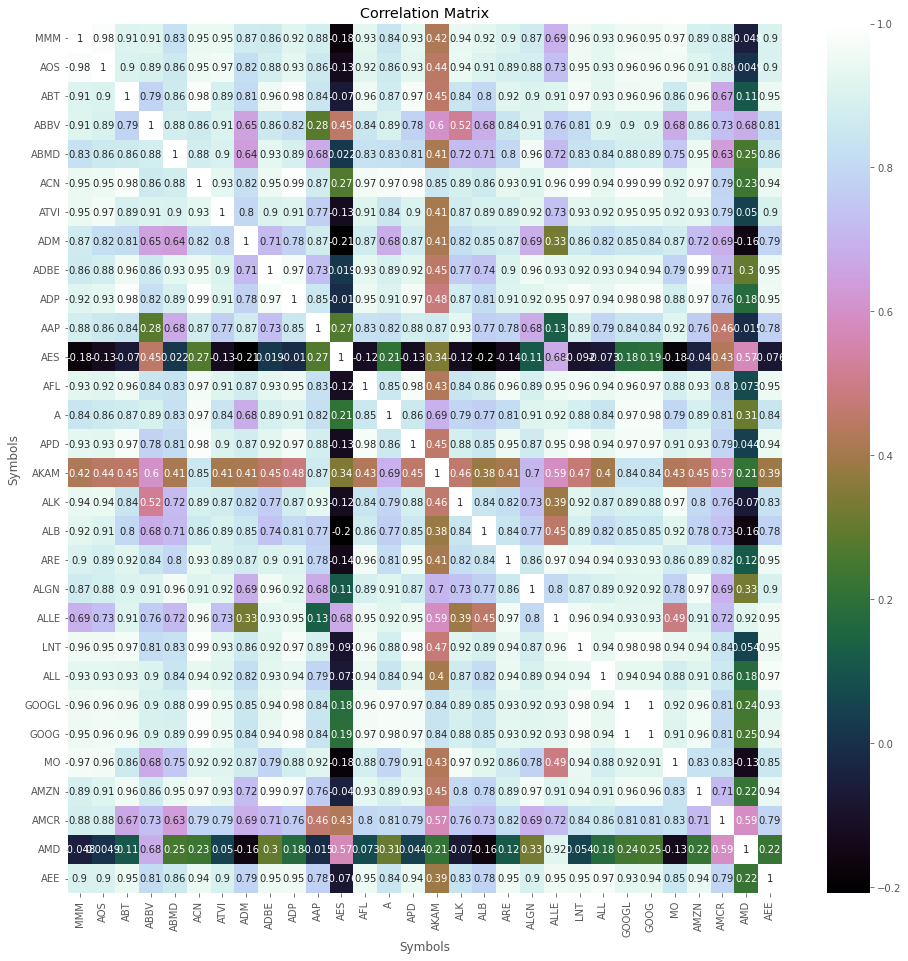

In [106]:
corr = ticket_df.corr()

plt.figure(figsize = (16, 16))

plt.title("Correlation Matrix")

sns.heatmap(corr, 
           annot = True, 
           cmap = 'cubehelix')

In [108]:
missing_frac = ticket_df.isnull().mean().sort_values(ascending = False)

missing_frac.head(10)

Symbols
ALLE     0.693898
ABBV     0.649771
AMCR     0.618366
GOOG     0.230968
GOOGL    0.230968
AAP      0.095011
ACN      0.077321
ALGN     0.053866
MMM      0.000000
ALB      0.000000
dtype: float64

In [109]:
drop_list = sorted(list(missing_frac[missing_frac > 0.3].index))

In [111]:
ticket_df.drop(drop_list, 
              axis = 1,
              inplace = True)

In [115]:
ticket_df = ticket_df.fillna(method = 'ffill')

In [117]:
ticket_df = ticket_df.dropna(axis = 0)

In [119]:
daily_log_return = np.log(ticket_df / ticket_df.shift(1))

In [121]:
daily_linear_returns = ticket_df.pct_change()

In [122]:
daily_linear_returns = daily_linear_returns[daily_linear_returns.apply(lambda x: (x - x.mean()).abs() < (3 * x.std())).all(1)]

In [123]:
scaler = StandardScaler().fit(daily_linear_returns)

In [126]:
scaled_ticket = pd.DataFrame(scaler.fit_transform(daily_linear_returns), 
                         columns = daily_linear_returns.columns, 
                         index = daily_linear_returns.index)

In [129]:
daily_linear_returns.dropna(how = 'any', inplace = True)

In [127]:
scaled_ticket.dropna(how = 'any', inplace = True)

### Model

#### Data Split

In [234]:
prop = int(len(scaled_ticket) * 0.8)

X_Train = scaled_ticket[:prop]

X_Test = scaled_ticket[prop:]

X_Train_Raw = daily_linear_returns[:prop]

X_Test_Raw = daily_linear_returns[prop:]

In [235]:
stock_tickets = scaled_ticket.columns.values

In [236]:
n_tickets = len(scaled_ticket)

In [239]:
pca = PCA()

In [240]:
PrincipalComponent = pca.fit(X_Train)

In [242]:
def PCWeights():
    """
    Principal Componment Weights
    """
    
    weights = pd.DataFrame()
    
    for i in range(len(pca.components_)):
        weights['weights_{}'.format(i)] = pca.components_[i] / sum(pca.components_[i])
        
        weights = weights.values.T
        return weights
    
weights = PCWeights()

In [ ]:
def PCWeights():
    """
    Principal Compoments Weights
    """
    weights = pd.DataFrame()
    
    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                   )
        
    weights = weights.values.T
    return weights

weights = PCWeights()

In [248]:
def sharpe_ratio(ts_returns, periods_per_year = 252):
    
    n_years = ts_returns.shape[0]/periods_per_year
    
    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                 ) - 1
    
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    
    annualized_sharpe = annualized_return / annualized_vol
    
    return annualized_return, annualized_vol, annualized_sharpe

In [249]:
def FindOptimalPortfolio():
    
    n_portfolios = len(pca.components_)
    
    annualized_ret = np.array([0.] * n_portfolios)
    
    sharpe_metric = np.array([0.] * n_portfolios)
    
    annualized_vol = np.array([0.] * n_portfolios)
    
    highest_sharpe = 0
    
    stock_tickers = scaled_dow.columns.values
    
    n_tickers = len(stock_tickers)
    
    PCs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = PCs[i] / sum(PCs[i]
                           )
        
        eigen_prtfi = pd.DataFrame(data = {"weights": pc_w.squeeze()*100}, 
                                   index = stock_tickers)
        
        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)
        
        eigen_prti_returns = np.dot(X_Train_Raw.loc[:, eigen_prtfi.index], 
                                    pc_w)
        
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(),
                                       index = X_Train_Raw.index)
        
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        
        annualized_ret[i] = er
        
        annualized_vol[i] = vol
        
        sharpe_metric[i] = sharpe
        
        sharpe_metric = np.nan_to_num(sharpe_metric)
        
    # HOW TO FIND A PORTFOLIO with the HIGHEST Sharpe Ratio
    
    highest_sharpe = np.argmax(sharpe_metric)
    
    print("Our Eigen Portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f" %
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100,
           annualized_vol[highest_sharpe]*100,
           sharpe_metric[highest_sharpe]
          )
         )
        
    results = pd.DataFrame(data = {"Return": annualized_ret, "Vol": annualized_vol, "Sharpe": sharpe_metric}
                           )
    
    results.dropna(inplace = True)
    
    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)
    
    print(results.head(15)
         )

In [250]:
FindOptimalPortfolio()

Our Eigen Portfolio #19 with the highest Sharpe. Return inf%, vol = 4371.06%, Sharpe = 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.00
          Return         Vol         Sharpe
26           inf   63.168859  1.797693e+308
24           inf  231.423810  1.797693e+308
19           inf   43.710619  1.797693e+308
8   1.248668e+06   28.145399   4.436489e+04
0   1.990198e-01    0.140040   1.421161e+00
5   1.870924e-01    0.545639   3.428868e-01
9   1.026617e-01    0.715071   1.435684e-01
4   4.632418e-02    0.700756   6.610597e-02
11 -1.423341e-01    1.336257  -1.065170e-01
7  -1.902569e-01    1.304134  -1.458876e-01
17 -1.000000e+00    5.289213  -1.890640e-01
14 -9.999855e-01    4.242589  -2.357017e-01
2  -9.765076e-01    3.418301

### <font color = red> Answer 7 is presented in the cell below: </font>

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊